In [2]:
from numpy.random import seed
seed(1)

In [3]:
import os
import tensorflow as tf

C:\Users\wavau\anaconda3\envs\pythondata\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\wavau\anaconda3\envs\pythondata\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\wavau\anaconda3\envs\pythondata\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\wavau\anaconda3\envs\pythondata\lib\site-packages

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot

In [8]:
x_df = pd.read_csv("..\\reduced_data\\steam_all_param_merged_nan_removed.csv")

x_df.head()

,appid,metascore,recommendations,positive_x,negative_x,developer,publisher,maxccu,success_class,suc_class,...,tagphilisophical,taggaming,tagfaith,tagmysterydungeon,tagfeaturefilm,tagsteammachine,tagclicker,taghardware,tag360video,tagvronly
0,10,88,100006.0,169280.0,4360.0,Valve,Valve,31930,A,1,...,0,0,0,0,0,0,0,0,0,0
1,20,0,3754.0,4628.0,800.0,Valve,Valve,236,F,0,...,0,0,0,0,0,0,0,0,0,0
2,30,79,2779.0,4527.0,493.0,Valve,Valve,364,F,0,...,0,0,0,0,0,0,0,0,0,0
3,40,0,1276.0,1651.0,353.0,Valve,Valve,629,F,0,...,0,0,0,0,0,0,0,0,0,0
4,50,0,8162.0,9938.0,520.0,Gearbox Software,Valve,620,F,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
x_df["developer"]=x_df["developer"].astype("category")
x_df["developer"]=x_df["developer"].cat.codes
x_df["publisher"]=x_df["publisher"].astype("category")
x_df["publisher"]=x_df["publisher"].cat.codes
x_df.head()

,appid,metascore,recommendations,positive_x,negative_x,developer,publisher,maxccu,success_class,suc_class,...,tagphilisophical,taggaming,tagfaith,tagmysterydungeon,tagfeaturefilm,tagsteammachine,tagclicker,taghardware,tag360video,tagvronly
0,10,88,100006.0,169280.0,4360.0,18255,15348,31930,A,1,...,0,0,0,0,0,0,0,0,0,0
1,20,0,3754.0,4628.0,800.0,18255,15348,236,F,0,...,0,0,0,0,0,0,0,0,0,0
2,30,79,2779.0,4527.0,493.0,18255,15348,364,F,0,...,0,0,0,0,0,0,0,0,0,0
3,40,0,1276.0,1651.0,353.0,18255,15348,629,F,0,...,0,0,0,0,0,0,0,0,0,0
4,50,0,8162.0,9938.0,520.0,6704,15348,620,F,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
reduced_x = x_df.drop(columns=["positive_x", "negative_x", "appid", "metascore", "recommendations", "maxccu", "success_class",
                              "suc_class", "followers", "positive_y", "negative_y", "totaltags"])
reduced_x

,developer,publisher,maxprice,maxdiscount,tagstrategy,tagaction,tagadventure,tagdesignillustration,tagutilities,tagfreetoplay,...,tagphilisophical,taggaming,tagfaith,tagmysterydungeon,tagfeaturefilm,tagsteammachine,tagclicker,taghardware,tag360video,tagvronly
0,18255,15348,999,90,602,5337,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,18255,15348,499,90,0,738,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18255,15348,499,90,14,156,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,18255,15348,499,90,0,626,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6704,15348,499,90,0,312,109,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31681,7882,6697,99,40,0,0,0,0,0,0,...,0,0,0,0,0,0,183,0,0,0
31682,3589,5609,99,0,20,72,65,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31683,19968,16855,999,0,0,214,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31684,349,353,0,0,0,0,476,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
X = reduced_x
y = x_df["suc_class"]
y.head()

0    1
1    0
2    0
3    0
4    0
Name: suc_class, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [13]:
X_train.shape, y_train.shape

((23764, 345), (23764,))

In [14]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [84]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_train_categorical[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [127]:
# model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_dim=X_train.shape[1]))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(y_train_categorical.shape[1], activation="softmax"))

In [86]:
model.compile(loss="mse",
              optimizer="adam", metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', patience=5)

In [87]:
history = model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2,
    validation_split=0.3,
    callbacks=[es]
)

Train on 16634 samples, validate on 7130 samples
Epoch 1/100
16634/16634 - 1s - loss: 0.1279 - acc: 0.8725 - val_loss: 0.0364 - val_acc: 0.9635
Epoch 2/100
16634/16634 - 1s - loss: 0.0436 - acc: 0.9549 - val_loss: 0.0245 - val_acc: 0.9746
Epoch 3/100
16634/16634 - 1s - loss: 0.0262 - acc: 0.9728 - val_loss: 0.0246 - val_acc: 0.9746
Epoch 4/100
16634/16634 - 1s - loss: 0.0241 - acc: 0.9744 - val_loss: 0.0242 - val_acc: 0.9750
Epoch 5/100
16634/16634 - 1s - loss: 0.0226 - acc: 0.9761 - val_loss: 0.0241 - val_acc: 0.9750
Epoch 6/100
16634/16634 - 1s - loss: 0.0211 - acc: 0.9772 - val_loss: 0.0242 - val_acc: 0.9749
Epoch 7/100
16634/16634 - 1s - loss: 0.0215 - acc: 0.9766 - val_loss: 0.0241 - val_acc: 0.9752
Epoch 8/100
16634/16634 - 1s - loss: 0.0202 - acc: 0.9778 - val_loss: 0.0241 - val_acc: 0.9752
Epoch 9/100
16634/16634 - 1s - loss: 0.0198 - acc: 0.9781 - val_loss: 0.0240 - val_acc: 0.9753
Epoch 10/100
16634/16634 - 1s - loss: 0.0211 - acc: 0.9767 - val_loss: 0.0236 - val_acc: 0.9755


In [88]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                3460      
_________________________________________________________________
batch_normalization_2 (Batch (None, 10)                40        
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 22        
Total params: 3,522
Trainable params: 3,502
Non-trainable params: 20
_________________________________________________________________


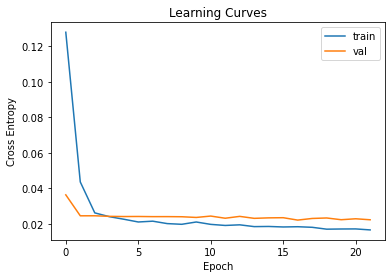

In [89]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [37]:
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test_categorical, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

7922/7922 - 0s - loss: 0.0218 - acc: 0.9764
Loss: 0.021782398660728314, Accuracy: 0.9763948321342468


In [108]:


import matplotlib.pyplot as plt
import numpy as np
import itertools
# Method source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [118]:
from sklearn.metrics import multilabel_confusion_matrix
predictions= model.predict_classes(X_test_scaled)
y_pred_binary = to_categorical(predictions, y_train_categorical.shape[1])

from sklearn import metrics


Confusion matrix, without normalization
[[7705    5]
 [ 188   24]]
[[7705    5]
 [ 188   24]]


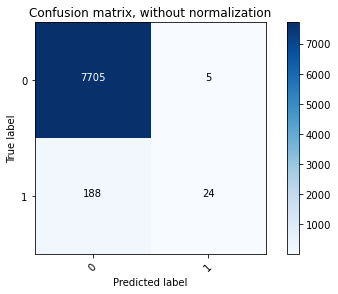

In [129]:
# print(predictions, y_test)
%matplotlib inline
confusion = metrics.confusion_matrix(y_test, predictions)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusion, classes=['0','1'],
                      title='Confusion matrix, without normalization')
print(confusion)

In [121]:

report = metrics.classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7710
           1       0.83      0.11      0.20       212

    accuracy                           0.98      7922
   macro avg       0.90      0.56      0.59      7922
weighted avg       0.97      0.98      0.97      7922



In [122]:
# Apply Area Under ROC Curve scoring model (AUROC)
from sklearn.metrics import roc_auc_score

# Predict class probabilities
prob_y_2 = model.predict_proba(X_test)
prob_y_2

array([[1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.2676513e-18],
       ...,
       [1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00]], dtype=float32)

In [123]:
# Keep only the positive class
prob_y_2 = [p[1] for p in prob_y_2]

In [124]:
print( roc_auc_score(y_test, prob_y_2) )

0.686845067665125
